## 感知机 (Perceptron)
感知机是一个线性二分类模型，该模型的目标是找到能将训练数据正确划分成两类的分离超平面。   
感知机是神经网络和SVM的基础。  

### 1.模型定义
假设输入数据的特征向量为 $x \in R^{n}$，输出为$y=\{+1, -1\}$，则感知机模型由如下函数定义：$$f(x)=sign(w\cdot x+b)$$
sign为符号函数，即$$ sign(x)=\left\{
\begin{aligned}
+1, \ x\geq 0 \\
-1, \ x<0 \\
\end{aligned}
\right.
$$
其中，$w\in R^{n}$为模型的权重参数，$b \in R$为模型的偏置参数。  
在训练数据线性可分的情况下，即存在某个超平面$w\cdot x+b$，对于所有正样本($y=1$)，有$w\cdot x+b>0$，对于所有负样本($y=-1$)，有$w\cdot x+b<0$，
感知机学习的目的就是找到这个超平面，而这个超平面是由**w**和**b**决定的，所以也就等同于找到正确的参数**w**和**b**。

### 2.损失函数
很容易想到用误分类样本的总数作为感知机的损失函数，但是存在的问题是，这样的损失函数对于参数w和b来说不是连续可导的，不易于优化。为此，感知机最终采用的损失函数是误分类样本到超平面的总距离，这个损失函数是连续可导函数。下面来一起看看这个损失函数的定义。 
  
先回忆下初中的数学知识，对于n维空间$R^{n}$中的任意一点$x_{0}$，到某平面S的距离为：$${|w\cdot x_{0}+b|}\over {||w||} $$
其中$||w||$是w的L2范数，即$||w||=\sqrt[]{\sum_{i=1}^{n}{w_{i}^2}}$ 。
  
对于误分类的正样本，有$y_{i}=+1$，$w\cdot x_{i}+b<0$；对于误分类的负样本，有$y_{i}=-1$，$w\cdot x_{i}+b>0$，  
因此，对于误分类的样本来说，总有$-y_{i}(w\cdot x_{i}+b)>0$，故误分类样本到超平面的距离可以写为：$$-\frac{y_{i}(w\cdot x_{i}+b)}{||w||} $$  
综上，假设被误分类的样本集合为M，所有误分类样本到超平面的距离之和为：$$-\frac{\sum_{x_{i}\in M} y_{i}(w\cdot x_{i}+b)}{||w||} $$
这个公式有个特点，就是当w和b以某个倍数缩放时，分子和分母会缩放相同的倍数，可以约掉，所以最终的损失函数可以只考虑分子，即$$L(w,b)=-\sum_{x_{i}\in M} y_{i}(w\cdot x_{i}+b)$$
这就是感知机模型的损失函数，该函数是w,b的连续可导函数。损失函数越小，则误分类点就离超平面越近，当损失函数为0时，则表明样本全部分类正确。感知机模型的目的就是找到使损失函数最小时的参数w和b。

### 3.算法流程
从上面可以知道，感知机学习问题实际上就是损失函数极小化问题：$min_{w,b}L(w,b)$，要求使得损失函数最小的w和b，我们先随机初始化w和b，然后采用**随机梯度下降(SGD)** 来优化求解。
> **随机梯度下降**：与批量梯度下降一次使用所有样本来更新参数不同，随机梯度下降一次只随机选取一个样本来更新参数。

损失函数$L(w,b)$关于w、b的梯度分别为：$$\frac{dL}{w} = -\sum_{x_{i}\in M}y_{i}x_{i}$$ $$\frac{dL}{b} = -\sum_{x_{i}\in M}y_{i}$$
随机选取一个误分类样本$(x_{i},y_{i})$，对w和b进行更新：$$w:=w+	\alpha y_{i}x_{i}$$ $$b:=b+	\alpha y_{i}$$
其中$\alpha \in(0,1]$是学习率(learning rate)  
  
综上，感知机算法求解步骤如下：  
>模型函数$f(x)=sign(w\cdot x+b)$，求解w,b
1. 随机初始化w,b
2. 在训练集中选取某个样本$(x_{i},y_{i})$
3. 如果$y_{i}(w\cdot x_{i}+b)\leq 0$，则更新参数：  
$w:=w+\alpha y_{i}x_{i}$  
$b:=b+\alpha y_{i}$
4. 继续执行第2步，直到没有误分类的样本

感知机算法的直观解释：  
当有一个样本被误分类时，即该样本位于分离超平面错误的一侧，则调整w和b的值，使超平面向误分类样本的一侧移动，直到超平面越过该误分类样本使其被正确分类。并且有定理已经证明，在训练集线性可分的情况下，该算法是可以收敛的，即经过有限次迭代后，可以找到一个能正确划分所有数据的超平面。(该定理叫做**Novikoff定理**，有兴趣的同学可以自己去搜索推导过程)

### 4.Code
说了这么多概念和理论，终于到了愉快的敲代码环节啦 :-）  
代码中使用Iris数据集，该数据集中每个样本有4个特征，共分为三类。为了方便可视化，训练时只使用了前两个特征和前两个类别。
#### 4.1 numpy版

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

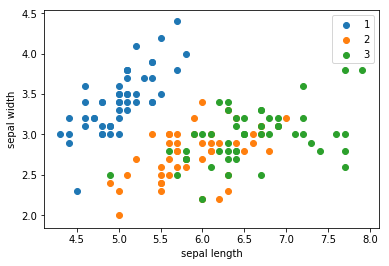

In [2]:
# 加载Iris数据集
iris = load_iris()
X = iris.data[:, :2]  # 只取前两个特征
Y = iris.target

# 可视化
plt.scatter(X[:50][:,0], X[:50][:,1], label='1')
plt.scatter(X[50: 100][:, 0], X[50: 100][:, 1], label='2')
plt.scatter(X[100:][:, 0], X[100:][:, 1], label='3')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

从图中可以看出，第1类数据与另外两类都是线性可分的，而第2类数据与第3类数据线性不可分，所以在后面训练中将只取第1类数据和第2类数据。

In [3]:
# 取前两类数据作为训练集
X = X[:100]
Y = Y[:100]

# 将类0转换为 -1
Y = np.where(Y, 1, -1) 

print('X shape：{}'.format(X.shape))
print('Y shape：{}'.format(Y.shape))

X shape：(100, 2)
Y shape：(100,)


In [4]:
class PLA(object):
    def __init__(self, lr=0.01, max_iter=1000, shuffle=True, log=True, log_step=50):
        self.max_iter = max_iter
        self.lr = lr
        self.shuffle = shuffle
        self.log = log
        self.log_step = log_step
        self.w = None
        self.b = 0
    
    def sign(self, x):
        return 1 if x >= 0 else -1
    
    def fit(self, X, Y):
        # 样本数量
        m = X.shape[0]
        # 初始化w
        self.w = np.random.randn(X.shape[1])
        # 打乱顺序
        if self.shuffle:
            idx = list(range(m))
            np.random.shuffle(idx)
            X, Y = X[idx], Y[idx]
        
        iter_count = 0
        while iter_count < self.max_iter:
            wrong_samples = []  # 用来存放误分类样本的Loss
            for i in range(m):
                x, y = X[i], Y[i]
                tmp = y * np.add(np.dot(self.w, x), self.b)  # y * (wx + b)
                if tmp <= 0:
                    # 更新w,b
                    self.w += self.lr * y * x
                    self.b += self.lr * y
                    wrong_samples.append(-tmp)
            
            # 如果wrong_samples为空，则说明所有样本都被正确分类，训练结束
            if not wrong_samples:
                print('iter_count: {}\tloss: 0.0'.format(iter_count))
                break
                
            if self.log:
                # 每迭代50次打印一次训练日志
                if iter_count % self.log_step == 0 and wrong_samples:
                    loss = np.sum(wrong_samples)
                    print('iter_count: {}\tloss: {:.4f}'.format(iter_count, loss))

            iter_count += 1
            
    def predict(self, x):
        value = np.dot(self.w, x) + self.b
        pred = self.sign(value)
        return pred

In [5]:
# 训练
pla = PLA()
pla.fit(X, Y)

iter_count: 0	loss: 17.7147
iter_count: 50	loss: 0.7581
iter_count: 100	loss: 0.6863
iter_count: 150	loss: 0.5763
iter_count: 200	loss: 0.5845
iter_count: 250	loss: 0.4689
iter_count: 300	loss: 0.4641
iter_count: 350	loss: 0.3491
iter_count: 400	loss: 0.3146
iter_count: 450	loss: 0.2916
iter_count: 500	loss: 0.0


In [6]:
# 模型学到的w和b
print('w: {}'.format(pla.w))
print('b: {}'.format(pla.b))

w: [ 0.73338557 -0.91852932]
b: -1.1900000000000008


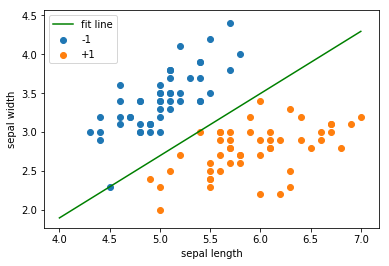

In [7]:
x0s = np.array([4.0, 7.0])
x1s = -(pla.w[0] * x0s + pla.b) / pla.w[1]
plt.plot(x0s, x1s, label='fit line', color='green')

plt.scatter(X[:50][:,0], X[:50][:,1], label='-1')
plt.scatter(X[50:100][:, 0], X[50:100][:, 1], label='+1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

In [8]:
# 预测
test_pos_data = np.array([7.0, 3.5])  # 任意定义一个正样本
test_neg_data = np.array([4.2, 2.5])  # 任意定义一个负样本
print(pla.predict(test_pos_data))
print(pla.predict(test_neg_data))

1
-1


#### 4.2 sklearn版

In [9]:
from sklearn.linear_model import Perceptron

In [10]:
# 训练
pla = Perceptron(alpha=0.01, max_iter=1000)
pla.fit(X, Y)

Perceptron(alpha=0.01, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=1000, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [11]:
# 模型学到的w和b
w = pla.coef_[0]
b = pla.intercept_[0]
print('w: {}'.format(w))
print('b: {}'.format(b))

w: [ 67.2 -85.6]
b: -106.0


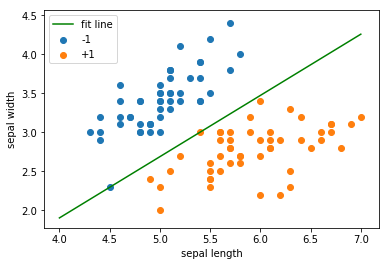

In [12]:
x0s = np.array([4.0, 7.0])
x1s = -(w[0] * x0s + b) / w[1]
plt.plot(x0s, x1s, label='fit line', color='green')

plt.scatter(X[:50][:,0], X[:50][:,1], label='-1')
plt.scatter(X[50:100][:, 0], X[50:100][:, 1], label='+1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

In [13]:
# 预测
test_pos_data = np.array([7.0, 3.5])  # 任意定义一个正样本
test_neg_data = np.array([4.2, 2.5])  # 任意定义一个负样本
print(pla.predict(test_pos_data.reshape(1, -1)))
print(pla.predict(test_neg_data.reshape(1, -1)))

[1]
[-1]


#### 4.3 tensorflow版

In [14]:
import tensorflow as tf

In [15]:
# Parameters
lr = 0.01
max_epochs = 1000
log_step = 50

# tf计算图的输入
X_input = tf.placeholder(tf.float32, shape=(None, 2), name='X')
Y_input = tf.placeholder(tf.float32, shape=(None, 1), name='Y')

# 初始化参数
W = tf.Variable(tf.random_normal([2, 1]), dtype=tf.float32, name='weight')
b = tf.Variable(0.0, dtype=tf.float32, name='bias')

# y * (wx + b)
pred = tf.squeeze(tf.multiply(Y_input, tf.matmul(X_input, W) + b))

# loss
loss = -tf.reduce_sum(pred)

# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(lr).minimize(loss)

In [16]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 训练
for epoch in range(max_epochs):
    wrong_samples = []  # 用来存放误分类样本loss
    for x, y in zip(X, Y):
        feed_dict = {X_input: x.reshape(-1, 2), Y_input: y.reshape(-1, 1)}
        loss = sess.run(pred, feed_dict=feed_dict)
        if loss < 0:
            sess.run(optimizer, feed_dict=feed_dict)
            wrong_samples.append(loss)

    if not wrong_samples:
        print('epoch: {}\tloss: 0.0'.format(epoch))
        break

    if epoch % log_step == 0:
        total_loss = sess.run(-tf.reduce_sum(wrong_samples))
        print('epoch: {}\tloss: {:.4f}'.format(epoch, total_loss))

epoch: 0	loss: 20.3599
epoch: 50	loss: 0.3290
epoch: 76	loss: 0.0


In [17]:
w = np.squeeze(sess.run(W))
b = sess.run(b)
print('w: {}'.format(w))
print('b: {}'.format(b))

w: [ 0.16883528 -0.21350843]
b: -0.27000001072883606


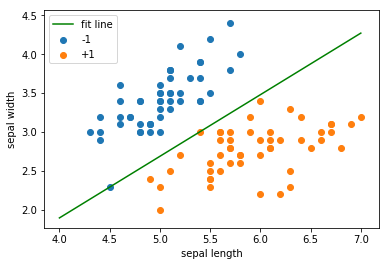

In [18]:
x0s = np.array([4.0, 7.0])
x1s = -(w[0] * x0s + b) / w[1]
plt.plot(x0s, x1s, label='fit line', color='green')

plt.scatter(X[:50][:,0], X[:50][:,1], label='-1')
plt.scatter(X[50:100][:, 0], X[50:100][:, 1], label='+1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()         

### 5.总结
- 感知机模型的函数表示：$f(x)=sign(w\cdot x + b)$
- 损失函数为误分类样本到分离超平面的距离之和：$L(w,b)=-\sum_{x_{i}\in M} y_{i}(w\cdot x_{i}+b)$
- 使用随机梯度下降来优化损失函数
- 当训练集是线性可分时，感知机算法是一定可以找到将训练集完全正确分离的超平面的
- 当训练集是线性可分时，感知机算法存在无穷多个解，这些解由于不同的初值选择或不同的迭代顺序而不同